# Tutorial 8

**Suzuki - Trotter decomposition**
Very useful. Also known as *symplectic method*
For two non-commuting operators $H_0$, $V$ we have:
$$e^{-\Delta \tau(H_0 + V)} = e^{-\Delta\tau(V/2)}e^{-\Delta \tau H_0}e^{-\Delta\tau(V/2)} + O((\Delta\tau)^3)$$

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import numba as nb
import matplotlib.pyplot as plt

## Task I

In [3]:
N = 8
beta = 4
delta = 1
# delta = np.random.random()
max_MCS = 10000
x_k_tab = np.random.random(size=(N))

In [4]:
@nb.jit(nopython=True)
def rho_free(x, y, dt):
    return np.exp(-(np.power((x-y), 2))/(2*dt))

In [5]:
@nb.jit(nopython=True)
def MCS(x_k_tab, delta, N, beta):
    dt = beta/N
    x_tab = x_k_tab.copy()
    for i in range(N):
        x_prime_tab = np.add(x_tab, np.random.uniform(-delta, delta, size=x_tab.shape[0]))
        k = np.random.randint(0, N)
        kplus = (k + 1)%N
        kminus = (k - 1)%N
        pi_a = rho_free(x_tab[kminus], x_tab[k], dt)*rho_free(x_tab[k], x_tab[kplus], dt)*np.exp(-0.5*dt*np.power(x_tab[k], 2))
        pi_b = rho_free(x_tab[kminus], x_prime_tab[k], dt)*rho_free(x_prime_tab[k], x_tab[kplus], dt)*np.exp(-0.5*dt*np.power(x_prime_tab[k], 2))
        try:
            upsilon = pi_b/pi_a
            if upsilon > np.random.random():
                x_tab[k] = x_prime_tab[k]
        except:
            continue
    return x_tab

In [6]:
@nb.jit(nopython=True)
def make_MC(max_MCS,x_k_tab, delta, N, beta):
    x_tab = x_k_tab
    mean_x_tab = np.zeros(max_MCS)
    var_x_tab = np.zeros(max_MCS)
    for step in range(max_MCS):
        x_tab = MCS(x_tab, delta, N, beta)
        mean_x_tab[step] = np.sum(x_tab)/N
        var_x_tab[step] = np.var(x_tab)
    return mean_x_tab, var_x_tab

In [7]:
out = make_MC(max_MCS, x_k_tab, delta, N, beta)

In [8]:
out

(array([ 0.54658925,  0.37848785,  0.39423436, ..., -0.10940797,
         0.06183156, -0.01833831]),
 array([0.11996303, 0.14252001, 0.11371875, ..., 0.21231566, 0.28673545,
        0.242184  ]))

Text(0.5, 1.0, '$<\\Delta^2 x>$')

<Figure size 432x288 with 0 Axes>

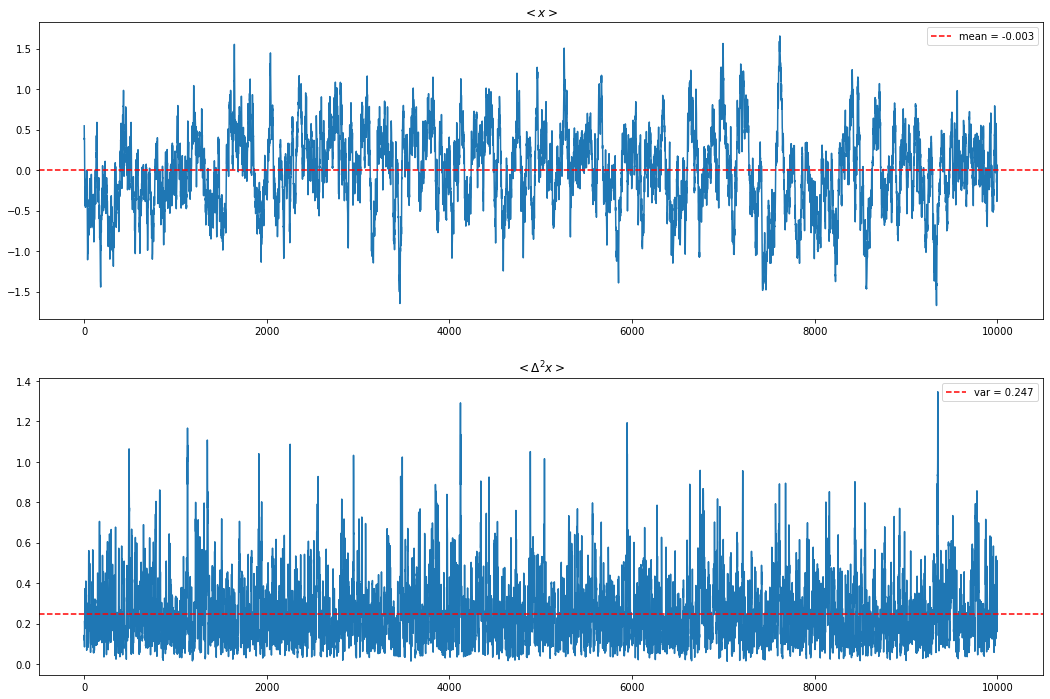

In [193]:
fig_1 = plt.figure(1)
_, axs = plt.subplots(2, 1, sharey="row", figsize=(18, 12))
x = np.linspace(0, max_MCS, max_MCS)
axs[0].plot(x, out[0], "-")
axs[0].axhline(out[0].mean(), linestyle="--", color="r", label="mean = {:.03f}".format(out[0].mean()))
axs[0].legend()
axs[1].plot(x, out[1], "-")
axs[1].axhline(out[1].mean(), linestyle="--", color="r", label="var = {:.03f}".format(out[1].mean()))
axs[1].legend()
axs[0].set_title("$<x>$")
axs[1].set_title("$<\Delta^2 x>$")

## Task II

In [86]:
@nb.jit(nopython=True)
def MCS_II(x_k_tab, delta, N, beta):
    acc_rate = 0
    dt = beta/N
    x_tab = x_k_tab.copy()
    for i in range(N):
        x_prime_tab = np.add(x_tab, np.random.uniform(-delta, delta, size=x_tab.shape[0]))
        k = np.random.randint(0, N)
        kplus = (k + 1)%N
        kminus = (k - 1)%N
        pi_a = rho_free(x_tab[kminus], x_tab[k], dt)*rho_free(x_tab[k], x_tab[kplus], dt)*np.exp(-0.5*dt*np.power(x_tab[k], 2))
        pi_b = rho_free(x_tab[kminus], x_prime_tab[k], dt)*rho_free(x_prime_tab[k], x_tab[kplus], dt)*np.exp(-0.5*dt*np.power(x_prime_tab[k], 2))
        try:
            upsilon = pi_b/pi_a
            if upsilon > np.random.random():
                x_tab[k] = x_prime_tab[k]
                acc_rate += 1
        except:
            continue
    acc_rate = acc_rate/N
    return x_tab, acc_rate

In [91]:
@nb.jit(nopython=True)
def make_MC_II(max_MCS,x_k_tab, delta, N, beta):
    x_tab = x_k_tab
    mean_x_tab = np.zeros(max_MCS)
    var_x_tab = np.zeros(max_MCS)
    acc_rate_tab = np.zeros(max_MCS)
    x_0_tab = np.zeros(max_MCS)
    x_n_2_tab = np.zeros(max_MCS)
    for step in range(max_MCS):
        x_tab, acc_rate = MCS_II(x_tab, delta, N, beta)
        acc_rate_tab[step] = acc_rate
        mean_x_tab[step] = np.sum(x_tab)/N
        var_x_tab[step] = np.var(x_tab)
        x_0_tab[step] = x_tab[0]
        x_n_2_tab[step] = x_tab[N//2]
    return mean_x_tab, var_x_tab, np.mean(acc_rate_tab), x_0_tab, x_n_2_tab

In [170]:
delta_new = 0.289355819665899
N_new = 40
beta_new = 4
max_MCS_new = 100000
x_k_tab = np.random.random(size=(N_new))

In [171]:
out_II = make_MC_II(max_MCS_new, x_k_tab, delta_new, N_new, beta_new)

In [172]:
out_II[2]*100

75.03607500000031

In [168]:
# delta_new = delta_new * out_II[2]/0.75

In [169]:
# delta_new

0.289355819665899

Text(0.5, 1.0, '$<\\Delta^2 x>$')

<Figure size 432x288 with 0 Axes>

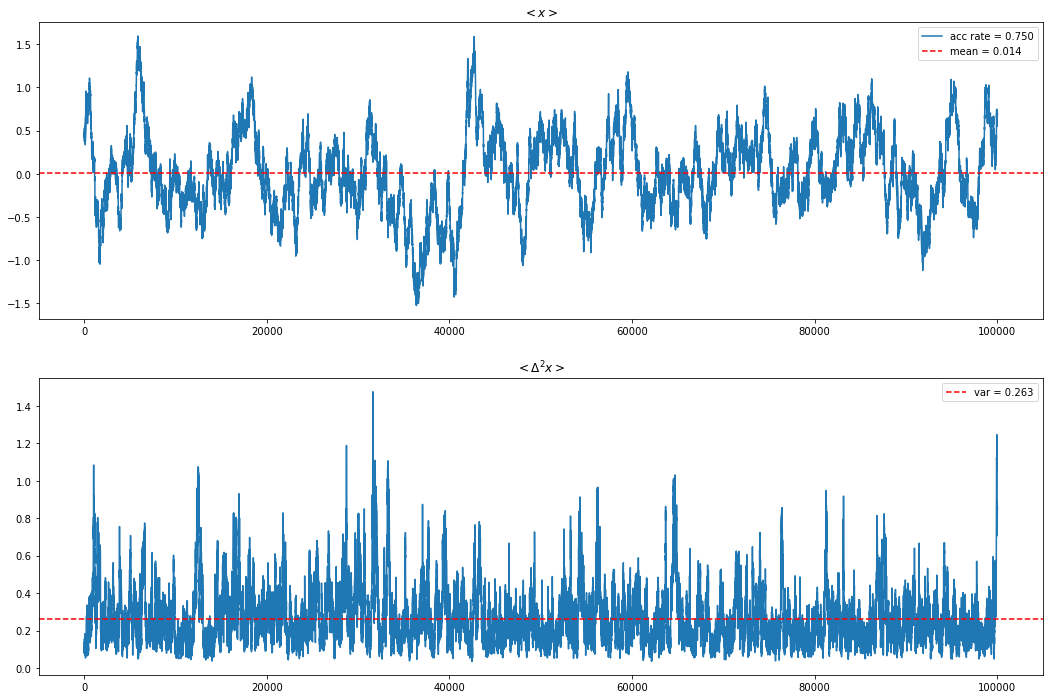

In [192]:
fig_2 = plt.figure(2)
_, axs = plt.subplots(2, 1, sharey="row", figsize=(18, 12))
x = np.linspace(0, max_MCS_new, max_MCS_new)
axs[0].plot(x, out_II[0], "-", label="acc rate = {:.03f}".format(out_II[2]))
axs[0].axhline(out_II[0].mean(), linestyle="--", color="r", label="mean = {:.03f}".format(out_II[0].mean()))
axs[0].legend()
axs[1].plot(x, out_II[1], "-")
axs[1].axhline(out_II[1].mean(), linestyle="--", color="r", label="var = {:.03f}".format(out_II[1].mean()))
axs[1].legend()
axs[0].set_title("$<x>$")
axs[1].set_title("$<\Delta^2 x>$")

In [186]:
def get_pi(x, beta):
    sigma_2 = 1/(2*np.tanh(beta/2))
    pi = np.exp(-np.power(x,2)/(2*sigma_2))/np.sqrt(2*np.pi*sigma_2)
    return pi

<Figure size 432x288 with 0 Axes>

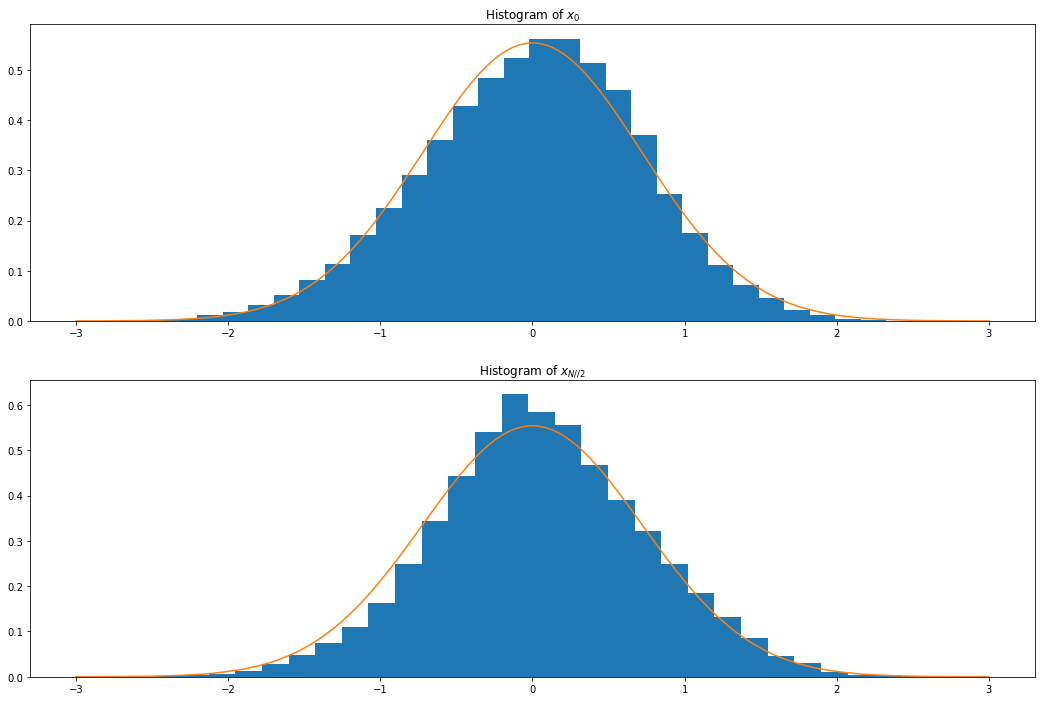

In [190]:
fig_3 = plt.figure(3)
_, axs = plt.subplots(2, 1, sharey="row", figsize=(18, 12))
x = np.linspace(-3, 3, 200)
axs[0].hist(out_II[3], bins=30, density=True)
axs[0].set_title("Histogram of $x_0$")
axs[0].plot(x, get_pi(x, beta_new))
# axs[0].axhline(out_II[0].mean(), linestyle="--", color="r", label="mean = {:.03f}".format(out_II[0].mean()))
axs[1].hist(out_II[4], bins=30, density=True)
axs[1].set_title("Histogram of $x_{N//2}$")
axs[1].plot(x, get_pi(x, beta_new))
# axs[1].axhline(out_II[1].mean(), linestyle="--", color="r", label="var = {:.03f}".format(out_II[1].mean()))

# plt.hist(out_II[3], bins=30)